In [1]:
import pandas as pd
from keras.models import Sequential
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

2022-12-19 05:37:16.043959: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-19 05:37:16.663706: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-19 05:37:16.663728: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-19 05:37:18.087477: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [2]:
all_data = pd.read_csv('../10_cleaned_data/processed_text.csv')
all_text = all_data['clean_text']

#all_data = pd.read_csv('../00_source_data/synthetic_data_50k.csv')
#all_text = all_data['text']

In [3]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(all_text)
sequences = tokenizer.texts_to_sequences(all_text)
reviews = pad_sequences(sequences, maxlen=max_len)
print(reviews)

[[   0    0    0 ...  153   52  434]
 [   0    0    0 ...    1 2046   57]
 [   0    0    0 ...   78   51  193]
 ...
 [   0    0    0 ...   16   10   32]
 [   0    0    0 ...  173   14   87]
 [   0    0    0 ...    0   56   41]]


In [4]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [5]:
data = pd.read_csv('../10_cleaned_data/processed_text.csv')
#data = pd.read_csv('../00_source_data/synthetic_data_50k.csv')

from sklearn.model_selection import train_test_split
#X = data['clean_text']
Y = data['label']
X_train, X_test, Y_train, Y_test = train_test_split(reviews, Y, test_size = 0.2, random_state = 42)

In [6]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from spacy.lang.en.stop_words import STOP_WORDS
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
vocab_size = len(tokenizer.word_index) + 1
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True, input_shape=(None, 1))))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
adam = Adam(learning_rate=0.01)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer=adam, 
    metrics=['accuracy']
)
model.summary()

2022-12-19 05:37:24.179708: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-19 05:37:24.179737: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-19 05:37:24.179755: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-a029c5): /proc/driver/nvidia/version does not exist
2022-12-19 05:37:24.500890: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 64)           1607424   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         66048     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 200, 128)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4

In [7]:
history = model.fit(X_train, Y_train.values, epochs=10, verbose=1, batch_size=64)

Epoch 1/10


/home/codespace/.venv/lib/python3.10/site-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


355/355 [==============================] - 51s 130ms/step - loss: 0.3866 - accuracy: 0.8365
Epoch 2/10
355/355 [==============================] - 47s 131ms/step - loss: 0.2568 - accuracy: 0.9077
Epoch 3/10
355/355 [==============================] - 48s 134ms/step - loss: 0.2086 - accuracy: 0.9264
Epoch 4/10
355/355 [==============================] - 48s 134ms/step - loss: 0.1783 - accuracy: 0.9381
Epoch 5/10
355/355 [==============================] - 48s 135ms/step - loss: 0.1640 - accuracy: 0.9426
Epoch 6/10
355/355 [==============================] - 48s 135ms/step - loss: 0.1453 - accuracy: 0.9499
Epoch 7/10
355/355 [==============================] - 48s 134ms/step - loss: 0.1322 - accuracy: 0.9550
Epoch 8/10
355/355 [==============================] - 48s 134ms/step - loss: 0.1304 - accuracy: 0.9550
Epoch 9/10
355/355 [==============================] - 48s 134ms/step - loss: 0.1183 - accuracy: 0.9583
Epoch 10/10
355/355 [==============================] - 48s 135ms/step - loss: 0.1123

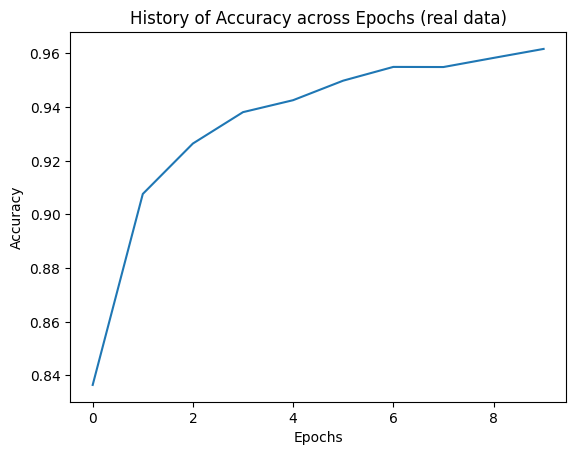

In [8]:
import matplotlib.pyplot as plt
fig = plt.plot(history.history['accuracy'])
title = plt.title("History of Accuracy across Epochs (real data)")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")

In [9]:
predictions = model.predict(reviews[:4])
for pred in predictions:
    print(pred[0])
print(data[:4]['label'])

1/1 [==============================] - 1s 1s/step
0.002185199
0.016225765
0.007425729
0.00012555583
0    0
1    0
2    0
3    0
Name: label, dtype: int64


In [10]:
model.predict(X_test)

178/178 [==============================] - 5s 30ms/step


array([[9.9660712e-01],
       [1.1736976e-03],
       [1.5720630e-04],
       ...,
       [9.9932826e-01],
       [4.6561223e-02],
       [9.9859399e-01]], dtype=float32)

In [11]:
cvscores = []

scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)

/home/codespace/.venv/lib/python3.10/site-packages/keras/backend.py:5676: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


accuracy: 87.68%


In [12]:
model.metrics_names

['loss', 'accuracy']